In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

# Câu hỏi 5: Tình trạng xuất, nhập khẩu của các nước ở Châu Âu

Câu hỏi sẽ trả lời được: 

- Hàng hóa nào được các nước ở Châu Âu xuất khẩu nhiều nhất?
- Top các nước xuất khẩu mặt hàng đó
- Hàng hóa nào được các nước ở Châu Âu nhập khẩu nhiều nhất?
- Top các nước nhập khẩu mặt hàng đó

=> Từ đó rút ra kết luận về tình trạng xuất, nhập khẩu của các nước Châu Âu

In [82]:
df = pd.read_csv("Europe.csv")
eu_df = df.drop(['quantity_footnotes'], axis=1)
eu_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates


## Tình trạng xuất khẩu

### Xử lí số liệu

In [86]:
eu_df_copy = eu_df.copy()
eu_df_copy['commodity_transaction'] = eu_df_copy['commodity_transaction'].str.split('-', n = 1, expand = False).to_list()
split = pd.DataFrame(eu_df_copy['commodity_transaction'].to_list(),columns=['commodity','transaction'])
eu_df_copy = pd.concat([eu_df_copy,split],axis = 1)
eu_df_copy['transaction'] = eu_df_copy['transaction'].str.strip()


In [87]:
eu_df_copy = eu_df_copy[(eu_df_copy['transaction'] == 'exports') | (eu_df_copy['transaction'] == 'Exports')]
eu_df_copy = eu_df_copy[eu_df_copy['unit'] == 'Metric tons,  thousand']
list_commodity = eu_df_copy['commodity'].value_counts().index.to_list()
eu_commodity_export = {}
for comd in list_commodity:
    eu_commodity_export[comd] = eu_df_copy[eu_df_copy['commodity'] == comd]['quantity'].sum()

eu_commodity_export = dict(sorted(eu_commodity_export.items(),key = lambda x: x[1])[:-9:-1])
eu_commodity_export

{'Conventional crude oil ': 6197243.0,
 'Hard coal ': 2548507.0,
 'Gas Oil/ Diesel Oil ': 2513234.0,
 'Fuel oil ': 2213455.0,
 'Other bituminous coal ': 1920001.0,
 'Motor Gasoline ': 1461291.0,
 'Coking coal ': 523839.0,
 'Naphtha ': 469371.0}

### Biểu đồ về số lượng hàng hóa các nước ở Châu Âu xuất khẩu nhiều nhất

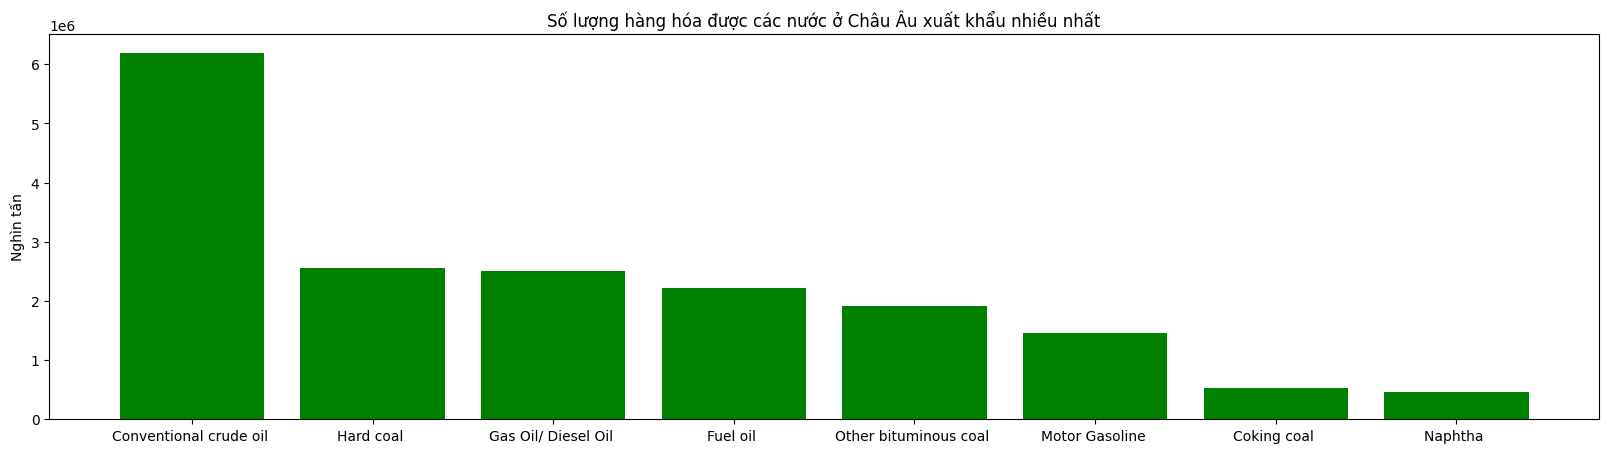

In [88]:
fig, ax=plt.subplots(figsize=(20,5))
ax.bar(list(eu_commodity_export.keys()),list(eu_commodity_export.values()),color='green')
ax.set_title("Số lượng hàng hóa được các nước ở Châu Âu xuất khẩu nhiều nhất")
ax.set_ylabel('Nghìn tấn')
plt.show()

<p> Dầu thô thông thường là lượng hàng hóa được các nước xuất khẩu nhiều nhất. Vậy xem 8 nước nào xuất khẩu lượng dầu thô này nhiều nhất?

In [89]:
country = eu_df_copy['country_or_area'].value_counts().index.to_list()
best_commodity_export = list(eu_commodity_export.keys())[0]
eu_best_commodity_export = {}
for c in country: 
    eu_best_commodity_export[c] = eu_df_copy[(eu_df_copy['country_or_area'] == c) | (eu_df_copy['commodity'] == best_commodity_export)]['quantity'].sum()

eu_best_commodity_export = dict(sorted(eu_best_commodity_export.items(),key = lambda x: x[1])[:-9:-1])
eu_best_commodity_export

{'Russian Federation': 11236874.71,
 'Netherlands': 8307188.0,
 'Poland': 7241007.0,
 'United Kingdom': 6946757.0,
 'Belgium': 6781959.0,
 'Italy': 6771527.0,
 'Germany': 6709316.761,
 'France': 6701207.588}

Biểu đồ về số lượng và tỉ lệ phần trăm của 8 nước Châu Âu sản xuất dầu thô thông thường nhiều nhất

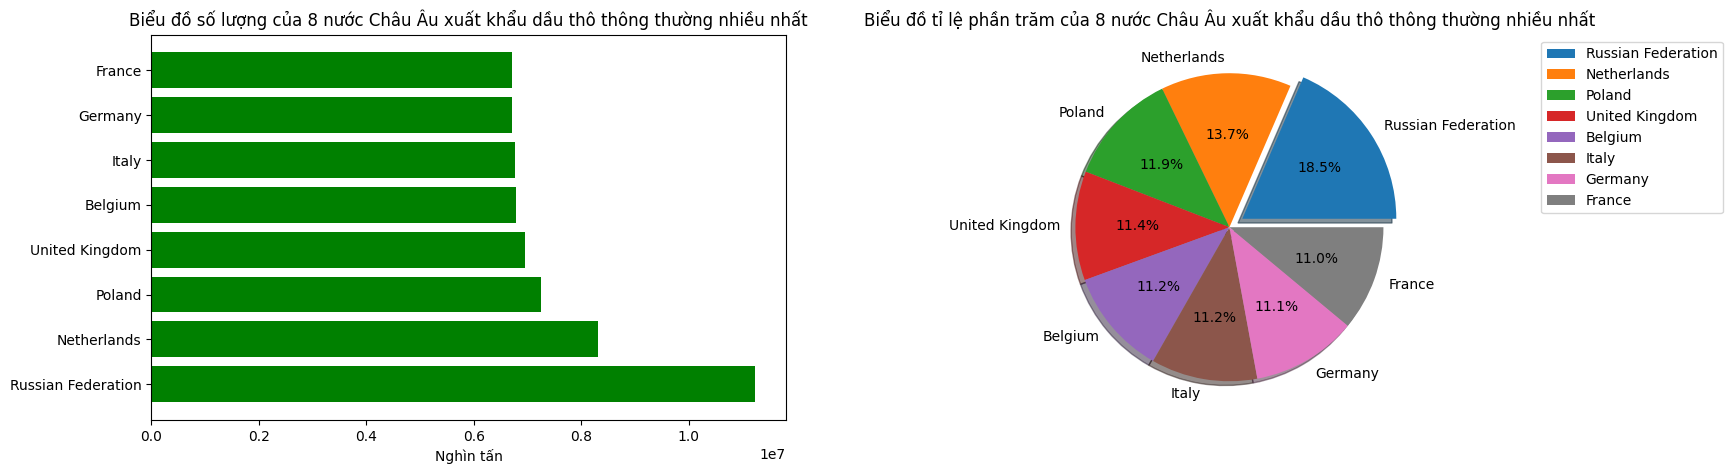

In [104]:
fig, ax= plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(18)
explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
ax[0].barh(list(eu_best_commodity_export.keys()),list(eu_best_commodity_export.values()),color='green')
ax[0].set_title("Biểu đồ số lượng của 8 nước Châu Âu xuất khẩu dầu thô thông thường nhiều nhất")
ax[0].set_xlabel('Nghìn tấn')
ax[1].pie(list(eu_best_commodity_export.values()),labels = list(eu_best_commodity_export.keys()),explode = explode, shadow = True,autopct='%1.1f%%')
ax[1].set_title("Biểu đồ tỉ lệ phần trăm của 8 nước Châu Âu xuất khẩu dầu thô thông thường nhiều nhất")
ax[1].legend(bbox_to_anchor =(1, 0, 0.8, 1))
plt.show()

## Tình trạng nhập khẩu

## Xử lí số liệu

In [93]:
eu_df_copy = eu_df.copy()
eu_df_copy['commodity_transaction'] = eu_df_copy['commodity_transaction'].str.split('-', n = 1, expand = False).to_list()
split = pd.DataFrame(eu_df_copy['commodity_transaction'].to_list(),columns=['commodity','transaction'])
eu_df_copy = pd.concat([eu_df_copy,split],axis = 1)
eu_df_copy['transaction'] = eu_df_copy['transaction'].str.strip()

In [98]:
eu_df_copy = eu_df_copy[(eu_df_copy['transaction'] == 'imports') | (eu_df_copy['transaction'] == 'Imports')]
eu_df_copy = eu_df_copy[eu_df_copy['unit'] == 'Metric tons,  thousand']
list_commodity = eu_df_copy['commodity'].value_counts().index.to_list()
eu_commodity_import = {}
for comd in list_commodity:
    eu_commodity_import[comd] = eu_df_copy[eu_df_copy['commodity'] == comd]['quantity'].sum()

eu_commodity_import = dict(sorted(eu_commodity_import.items(),key = lambda x: x[1])[:-9:-1])
eu_commodity_import

{'Conventional crude oil ': 14291446.0,
 'Hard coal ': 5550889.0,
 'Other bituminous coal ': 4148802.0,
 'Gas Oil/ Diesel Oil ': 2184783.0,
 'Fuel oil ': 1338653.0,
 'Coking coal ': 1271620.0,
 'Naphtha ': 747042.0,
 'Motor Gasoline ': 694859.0}

### Biểu đồ về số lượng hàng hóa các nước ở Châu Âu nhập khẩu nhiều nhất

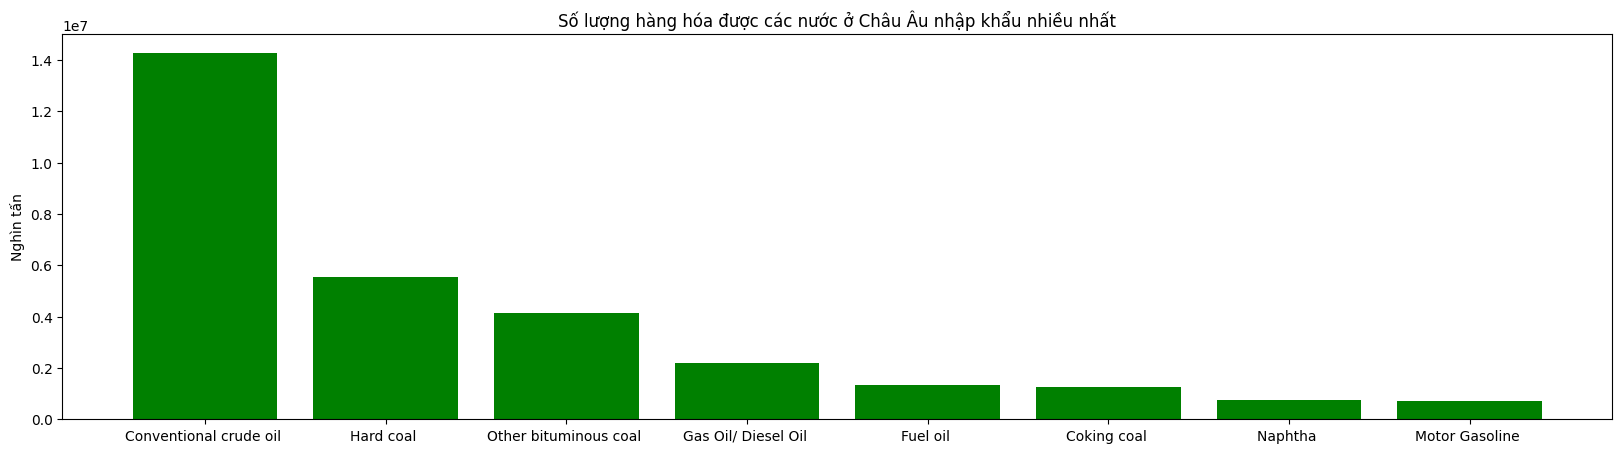

In [105]:
fig, ax=plt.subplots(figsize=(20,5))
ax.bar(list(eu_commodity_import.keys()),list(eu_commodity_import.values()),color='green')
ax.set_title("Số lượng hàng hóa được các nước ở Châu Âu nhập khẩu nhiều nhất")
ax.set_ylabel('Nghìn tấn')
plt.show()

<p> Dầu thô thông thường là lượng hàng hóa được các nước nhập khẩu nhiều nhất. Vậy xem 8 nước nào nhập khẩu lượng dầu thô này nhiều nhất?

In [106]:
country = eu_df_copy['country_or_area'].value_counts().index.to_list()
best_commodity_import = list(eu_commodity_import.keys())[0]
eu_best_commodity_import = {}
for c in country: 
    eu_best_commodity_import[c] = eu_df_copy[(eu_df_copy['country_or_area'] == c) | (eu_df_copy['commodity'] == best_commodity_import)]['quantity'].sum()

eu_best_commodity_import = dict(sorted(eu_best_commodity_import.items(),key = lambda x: x[1])[:-9:-1])
eu_best_commodity_import

{'Netherlands': 16934200.0,
 'Germany': 16795261.105,
 'United Kingdom': 16321941.0,
 'Italy': 15937759.0,
 'France': 15915986.743,
 'Spain': 15656367.0,
 'Russian Federation': 15513722.07,
 'Belgium': 15294697.0}

Biểu đồ về số lượng và tỉ lệ phần trăm của 8 nước Châu Âu nhập khẩu dầu thô thông thường nhiều nhất

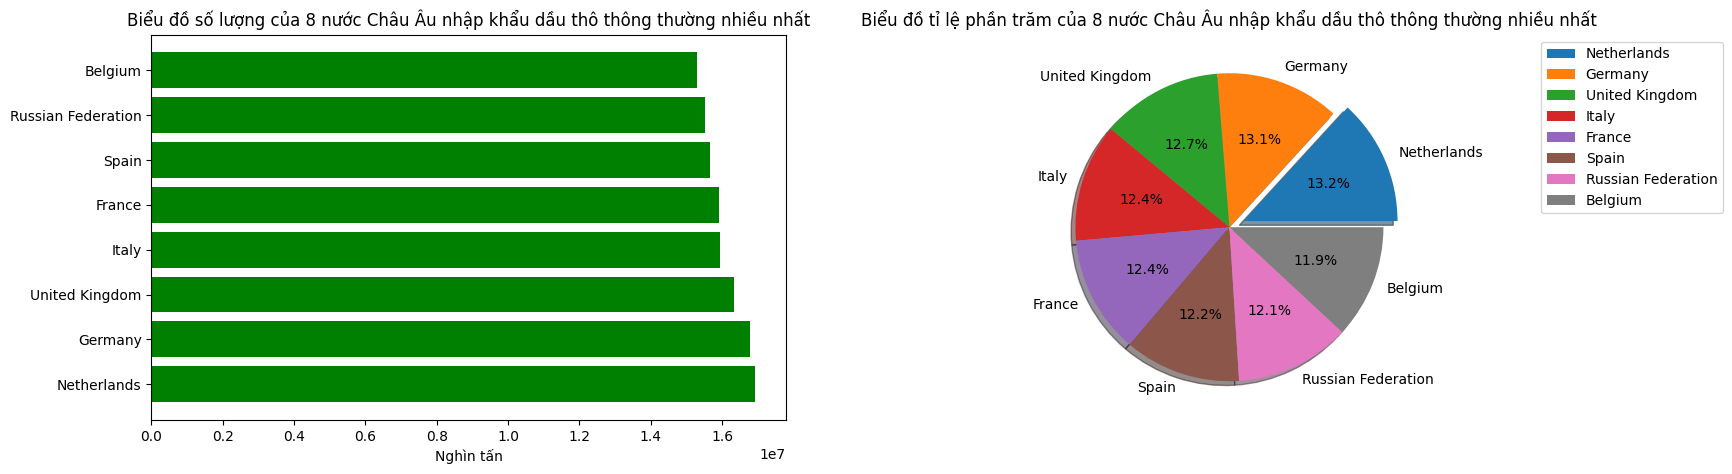

In [107]:
fig, ax= plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(18)
explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
ax[0].barh(list(eu_best_commodity_import.keys()),list(eu_best_commodity_import.values()),color='green')
ax[0].set_title("Biểu đồ số lượng của 8 nước Châu Âu nhập khẩu dầu thô thông thường nhiều nhất")
ax[0].set_xlabel('Nghìn tấn')
ax[1].pie(list(eu_best_commodity_import.values()),labels = list(eu_best_commodity_import.keys()),explode = explode, shadow = True,autopct='%1.1f%%')
ax[1].set_title("Biểu đồ tỉ lệ phần trăm của 8 nước Châu Âu nhập khẩu dầu thô thông thường nhiều nhất")
ax[1].legend(bbox_to_anchor =(1, 0, 0.8, 1))
plt.show()

### Rút ra kết luận:
<p> Nhìn vào biểu đồ về số lượng hàng hóa xuất nhập khẩu của các nước Châu Âu, dễ dàng thấy được dầu thô thông thường, than cứng, dầu khí/dầu diesel, nhiên liệu, than bitum luôn là các mặt hàng được ưa chuộng xuất nhập khẩu
<p> Còn đối với biểu đồ số lượng và tỉ lệ phần trăm của 8 nước Châu Âu xuất nhập khẩu dầu thô thông thường là khá cân bằng nhau(8 nước Châu Âu đứng đầu về xuất khẩu thì cũng đứng đầu về nhập khẩu), có vẻ các nước ở Châu Âu đều nhập khẩu và xuất khẩu 1 lượng khá bằng nhau (Ra bao nhiêu thu lại về bấy nhiêu) 
